In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
customers = pd.read_excel('KPMG_data.xlsx', sheet_name=3, index_col=0)
customers.head()

C:\Users\Binba\AppData\Local\Temp\ipykernel_11616\2617658175.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  customers = pd.read_excel('KPMG_data.xlsx', sheet_name=3, index_col=0)


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [4]:
# prepare the data for exploratory
# drop the unnecessary columns
customers.drop(['first_name', 'last_name', 'job_title', 'default'], axis=1, inplace=True)
# fix the gender column into Male, Female and unknown
customers['gender'].replace(['Femal', 'F'], 'Female', inplace=True)
customers['gender'].replace('M', 'Male', inplace=True)
customers['gender'].replace('U', 'unknown', inplace=True)
# change the deceased indicator column to 1 and 0
customers['deceased_indicator'].replace('Y', 1, inplace=True)
customers['deceased_indicator'].replace('N', 0, inplace=True)
# change the car owner column to 1 and 0
customers['owns_car'].replace('Yes', 1, inplace=True)
customers['owns_car'].replace('No', 0, inplace=True)
# get rid of the unaccepted DOB 1843
customers = customers[customers['DOB'] != customers.DOB.min()]
# get rid of deceased indicators keep only rows with 0
customers = customers[customers['deceased_indicator'] == 0]
customers.drop('deceased_indicator', axis=1, inplace=True)
# drop all the NaN values 
customers.dropna(inplace=True)

customers.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure
customer_id,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,1,11.0
2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0
3,Male,61,1954-01-20,Property,Mass Customer,1,15.0
4,Male,33,1961-10-03,IT,Mass Customer,0,7.0
6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0


In [5]:
# calculate the age and class them into age ranges and save in new columns
customers['age'] = (dt.datetime.now() - customers['DOB']) / np.timedelta64(1, 'Y')
customers['age_class'] = ((round(customers['age'] / 10)) * 10).astype(int)
customers.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class
customer_id,,,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,1,11.0,68.640722,70
2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0,41.461520,40
3,Male,61,1954-01-20,Property,Mass Customer,1,15.0,68.366932,70
4,Male,33,1961-10-03,IT,Mass Customer,0,7.0,60.665199,60
6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0,55.712326,60


In [6]:
# import the address dataset
address = pd.read_excel('KPMG_data.xlsx', sheet_name=4, index_col=0)
address.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,New South Wales,Australia,10
2,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,New South Wales,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [7]:
# standaradizing the states into one value foreach state and drop the NaN
address['state'].replace('New South Wales', 'NSW', inplace=True)
address['state'].replace('Victoria', 'VIC', inplace=True)
address = address.dropna()
address.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,NSW,Australia,10
2,6 Meadow Vale Court,2153,NSW,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,NSW,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [8]:
# connect the demographic data with the address data and create one dataset for them
customer_address = pd.merge(customers, address, left_index=True, right_index=True)
customer_address.dropna(inplace=True)
customer_address.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation
customer_id,,,,,,,,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,1,11.0,68.640722,70,060 Morning Avenue,2016,NSW,Australia,10
2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0,41.461520,40,6 Meadow Vale Court,2153,NSW,Australia,10
4,Male,33,1961-10-03,IT,Mass Customer,0,7.0,60.665199,60,0 Holy Cross Court,4211,QLD,Australia,9
6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0,55.712326,60,9 Oakridge Court,3216,VIC,Australia,9
7,Female,6,1976-02-23,Financial Services,Affluent Customer,1,11.0,46.274760,50,4 Delaware Trail,2210,NSW,Australia,9


In [9]:
# import the transaction dataset and sort it by the customer id
transaction = pd.read_excel('KPMG_data.xlsx', sheet_name=1, index_col=0)
transaction.sort_values('customer_id', inplace=True)
transaction.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-05
18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-09
16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-05
5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21
13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09


In [10]:
# check the missing values
transaction.isna().sum()

product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [11]:
# check the duplicated valuse
transaction.duplicated().sum()

0

In [12]:
# use if the date in numbers not in datetime data type

#transaction['product_first_sold_date'] = pd.TimedeltaIndex(transaction['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)
#transaction.head()

In [13]:
# drop the NaN values from the dataframe
transaction.dropna(inplace=True)
transaction.shape

(19445, 12)

In [14]:
# see some statistics about transaction date column
transaction['transaction_date'].describe()

C:\Users\Binba\AppData\Local\Temp\ipykernel_11616\1657712944.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transaction['transaction_date'].describe()


count                   19445
unique                    364
top       2017-08-18 00:00:00
freq                       81
first     2017-01-01 00:00:00
last      2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [15]:
# create a column with the most recent purchase in days
most_recent_purchase = transaction['transaction_date'].max()
transaction['last_purchase_days_ago'] = most_recent_purchase - transaction['transaction_date']
transaction['last_purchase_days_ago'] /= np.timedelta64(1, 'D')

# create a column with the net profit from each transaction
transaction['profit'] = transaction['list_price'] - transaction['standard_cost']

transaction.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,last_purchase_days_ago,profit
transaction_id,,,,,,,,,,,,,,
14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-05,278.0,75.75
18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-09,276.0,509.97
16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-05,21.0,75.14
5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21,233.0,189.28
13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09,312.0,17.87


In [16]:
# applying RFM Analysis
RFMTable = transaction.groupby('customer_id').agg({
    'last_purchase_days_ago': lambda x: x.min(),
    'customer_id': lambda x: len(x),
    'profit': lambda x: x.sum()
})

RFMTable.rename(columns={
    'last_purchase_days_ago': 'recency', 
    'customer_id': 'frequency', 
    'profit': 'monetary_value'
    }, inplace=True
)
RFMTable.head()

,recency,frequency,monetary_value
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,7,3290.21
4,195.0,2,220.57
5,16.0,6,2394.94


In [17]:
quart = RFMTable.quantile(q=[0.25,0.50,0.75])
quart

,recency,frequency,monetary_value
0.25,18.0,4.0,1797.43
0.50,45.0,5.0,2798.99
0.75,88.0,7.0,4122.44


In [18]:
def ROneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 4
    
def FMOneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 1

In [19]:
rfmSeg = RFMTable
rfmSeg['r_score'] = rfmSeg['recency'].apply(ROneHotEncoder, args=('recency', quart))
rfmSeg['f_score'] = rfmSeg['frequency'].apply(FMOneHotEncoder, args=('frequency', quart))
rfmSeg['m_score'] = rfmSeg['monetary_value'].apply(FMOneHotEncoder, args=('monetary_value', quart))
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score
customer_id,,,,,,
1,7.0,11,3018.09,1,1,3
2,128.0,3,2226.26,4,4,2
3,102.0,7,3290.21,4,3,3
4,195.0,2,220.57,4,4,4
5,16.0,6,2394.94,1,3,2


In [20]:
rfmSeg['rfm_class'] = 100 * rfmSeg['r_score'] + 10 * rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg['total_score'] = rfmSeg['r_score'] + rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score
customer_id,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,5
2,128.0,3,2226.26,4,4,2,442,10
3,102.0,7,3290.21,4,3,3,433,10
4,195.0,2,220.57,4,4,4,444,12
5,16.0,6,2394.94,1,3,2,132,6


In [21]:
rfm_quart = (rfmSeg['rfm_class'].min(), rfmSeg['rfm_class'].quantile(q=0.25),
                 rfmSeg['rfm_class'].median(), rfmSeg['rfm_class'].quantile(q=0.75), 
                 rfmSeg['rfm_class'].max())
rfm_quart

(111, 144.0, 244.0, 344.0, 444)

In [22]:
def RFMClassOneHotEncoder(x, p, d):
    if x <= d[0]:
        return 'gold'
    elif x <= d[1]:
        return 'silver'
    elif x <= d[2]: 
        return 'bronze'
    else: 
        return 'basic'

rfmSeg['customer_title'] = rfmSeg['rfm_class'].apply(RFMClassOneHotEncoder, args=('rfm_class', rfm_quart))
rfmSeg

# End of RFM Analysis

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title
customer_id,,,,,,,,,
1,7.0,11,3018.090000,1,1,3,113,5,silver
2,128.0,3,2226.260000,4,4,2,442,10,basic
3,102.0,7,3290.210000,4,3,3,433,10,basic
4,195.0,2,220.570000,4,4,4,444,12,basic
5,16.0,6,2394.940000,1,3,2,132,6,silver
...,...,...,...,...,...,...,...,...,...
3497,52.0,3,1648.320000,3,4,4,344,11,basic
3498,127.0,6,3147.330000,4,3,3,433,10,basic
3499,51.0,7,4955.250000,3,3,1,331,7,basic


In [23]:
# create the combined dataset of all the provided datasets
customer_address_transaction = pd.merge(rfmSeg, customer_address, left_index=True, right_index=True)
customer_address_transaction.columns

Index(['recency', 'frequency', 'monetary_value', 'r_score', 'f_score',
       'm_score', 'rfm_class', 'total_score', 'customer_title', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'age_class', 'address',
       'postcode', 'state', 'country', 'property_valuation'],
      dtype='object')

In [24]:
customer_address_transaction.shape

(2849, 23)

<AxesSubplot:xlabel='r_score'>

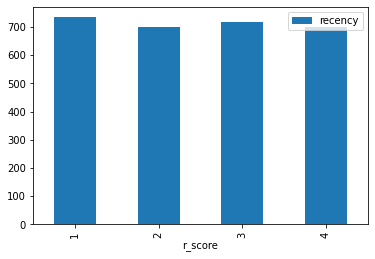

In [25]:
# RFM Analysis visualization
customer_address_transaction.groupby('r_score').agg('recency').count().to_frame().plot(kind='bar')

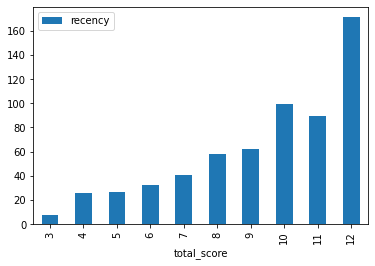

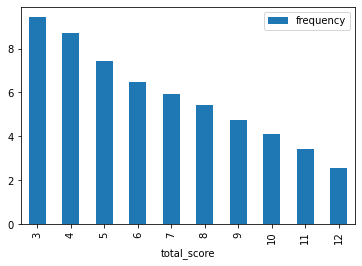

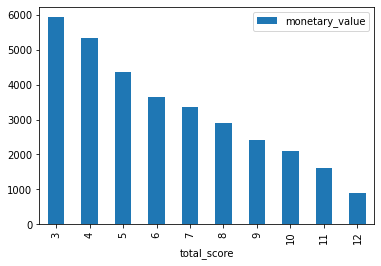

In [26]:
# RFM Analysis visualization
customer_address_transaction.groupby('total_score').agg('recency').mean().to_frame().plot(kind='bar')
customer_address_transaction.groupby('total_score').agg('frequency').mean().to_frame().plot(kind='bar')
customer_address_transaction.groupby('total_score').agg('monetary_value').mean().to_frame().plot(kind='bar')
plt.show()

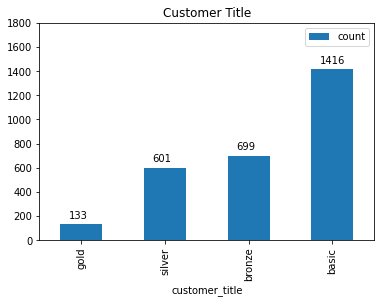

In [27]:
# RFM Analysis visualization
customer_titles_df = customer_address_transaction.groupby('customer_title').agg({
    'rfm_class': lambda x: len(x)
})
customer_titles_df.rename(columns={'rfm_class': 'count'}, inplace=True)
customer_titles_df.sort_values('count').plot(kind='bar')
for i, v in enumerate(customer_titles_df.sort_values('count')['count']):
    plt.text(i - .15, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1800])
plt.title('Customer Title')
plt.show()

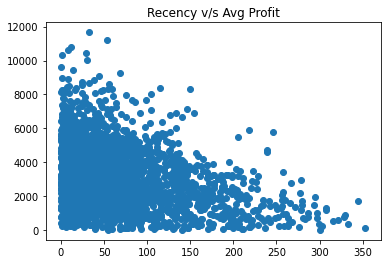

In [28]:
# RFM Analysis visualization
plt.scatter(customer_address_transaction['recency'], customer_address_transaction['monetary_value'])
plt.title('Recency v/s Avg Profit')
plt.show()

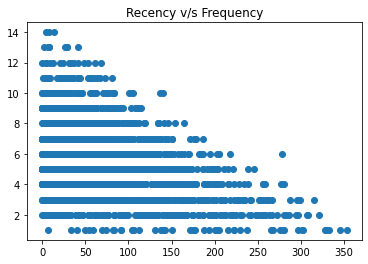

In [29]:
# RFM Analysis visualization
plt.scatter(customer_address_transaction['recency'], customer_address_transaction['frequency'])
plt.title('Recency v/s Frequency')
plt.show()

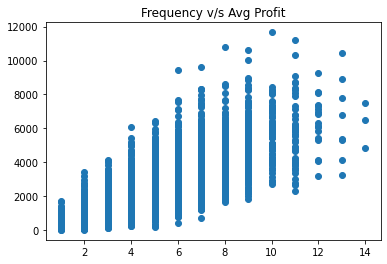

In [30]:
# RFM Analysis visualization
plt.scatter(customer_address_transaction['frequency'], customer_address_transaction['monetary_value'])
plt.title('Frequency v/s Avg Profit')
plt.show()

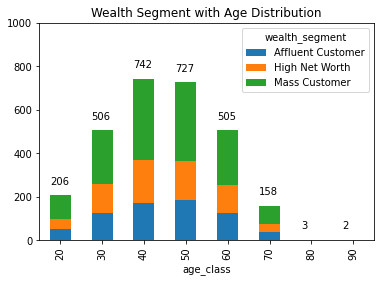

In [31]:
# Wealth Segment with Age Distribution graphe
customer_address_transaction.groupby('age_class')['wealth_segment'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(customer_address_transaction.groupby('age_class') \
                      .agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Wealth Segment with Age Distribution')
plt.show()

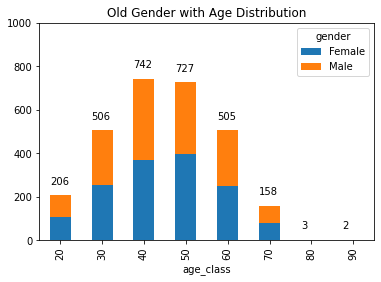

In [32]:
# Old Gender with Age Distribution graph
customer_address_transaction.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(customer_address_transaction.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Gender with Age Distribution')
plt.show()

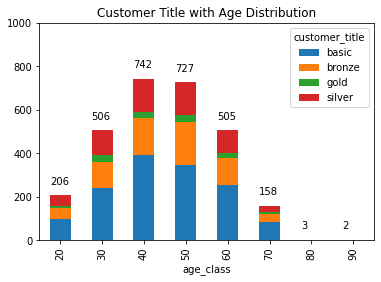

In [33]:
# Customer Title with Age Distribution graph
customer_address_transaction.groupby('age_class')['customer_title'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(customer_address_transaction.groupby('age_class') \
                      .agg({'customer_title': lambda x: len(x)})['customer_title']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Customer Title with Age Distribution')
plt.show()

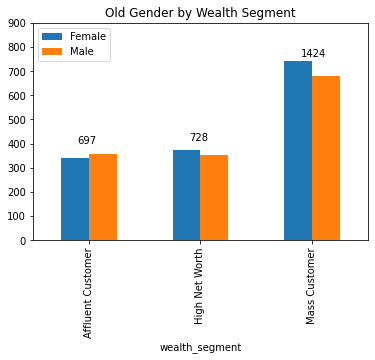

In [34]:
# Old Gender by Wealth Segment
customer_address_transaction.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(customer_address_transaction.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

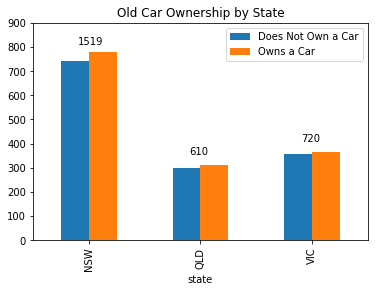

In [35]:
# Old Car Ownership by State graph
customer_address_transaction.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(customer_address_transaction.groupby('state') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Car Ownership by State')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

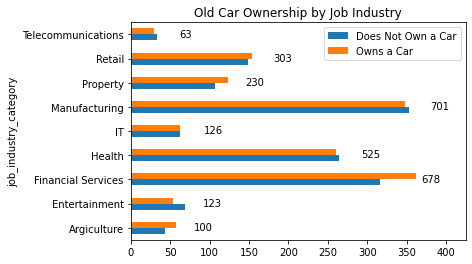

In [36]:
# Old Car Ownership by Job Industry graph
customer_address_transaction.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(customer_address_transaction.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 30, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,425])
plt.title('Old Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

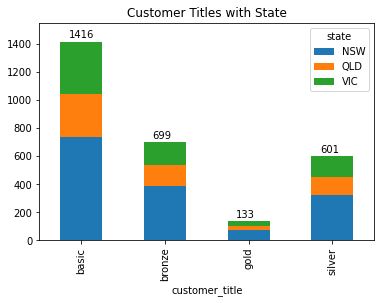

In [37]:
# Customer Titles with State graph
customer_address_transaction.groupby('customer_title')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(customer_address_transaction.groupby('customer_title') \
                      .agg({'state': lambda x: len(x)})['state']):
    plt.text(i - .15, v + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1550])
plt.title('Customer Titles with State')
plt.show()

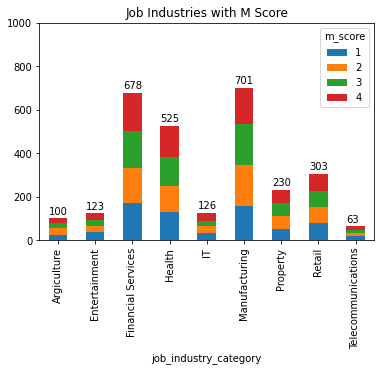

In [38]:
# Job Industries with monetary_value Score graph
customer_address_transaction.groupby('job_industry_category')['m_score'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(customer_address_transaction.groupby('job_industry_category') \
                      .agg({'m_score': lambda x: len(x)})['m_score']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Job Industries with M Score')
plt.show()

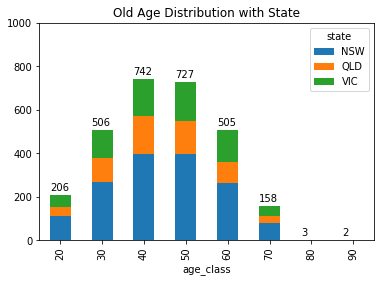

In [39]:
# Old Age Distribution with State graph
customer_address_transaction.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(customer_address_transaction.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Age Distribution with State')
plt.show()

In [40]:
# prechuses per gender
c = customer_address_transaction.groupby(['gender'])['past_3_years_bike_related_purchases'].sum().rename('count').to_frame()
c

,count
gender,
Female,69762
Male,69516


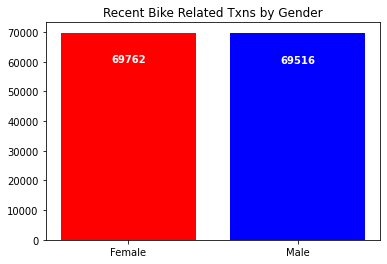

In [41]:
# Recent Bike Related Transactions by Gender graph
labels = ['Female', 'Male']
plt.bar(labels, c['count'], color=['red','blue'])
for i, v in enumerate(c['count']):
    plt.text(i - .1, v - 10e3, v, color='white', fontweight='bold')
plt.title('Recent Bike Related Txns by Gender')
plt.show()

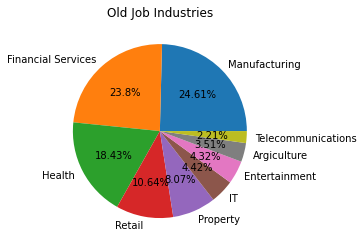

In [42]:
# Old and Job Industries graph
customer_address_transaction.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('Old Job Industries')
plt.ylabel('')
plt.show()

In [43]:
# Segmentation processing
c = customer_address_transaction.groupby('customer_title').agg({'age': lambda x: len(x)})
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

,count
customer_title,
basic,1416
bronze,699
gold,133
silver,601


In [44]:
c = customer_address_transaction.groupby(['state','customer_title']).agg({'age': lambda x: len(x)})
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

count
state customer_title       
NSW   basic             738
      bronze            389
      gold               69
      silver            323
QLD   basic             305
      bronze            146
      gold               33
      silver            126
VIC   basic             373
      bronze            164
      gold               31
      silver            152

In [45]:
c = customer_address_transaction.groupby(['total_score']).agg({'age': lambda x: x.count()}).cumsum()
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

,count
total_score,
3,133
4,295
5,557
6,890
7,1299
8,1711
9,2109
10,2416
11,2594


In [46]:
# import the new_customers dataset
newCustomers = pd.read_excel('KPMG_data.xlsx', sheet_name='NewCustomerList')
newCustomers.head()

C:\Users\Binba\AppData\Local\Temp\ipykernel_11616\82481719.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  newCustomers = pd.read_excel('KPMG_data.xlsx', sheet_name='NewCustomerList')


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,1.06,1.3250,1.65625,1.407813,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.48,0.4800,0.60000,0.510000,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.62,0.6200,0.62000,0.620000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,1.09,1.3625,1.36250,1.362500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.86,0.8600,1.07500,1.075000,4,4,1.703125


In [47]:
# check missing values
newCustomers.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [48]:
# check duplicated values
newCustomers.duplicated().sum()

0

In [49]:
newCustomers.shape

(1000, 23)

In [50]:
# Drop the missing values
newCustomers.dropna(inplace=True)
newCustomers

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,1.06,1.3250,1.65625,1.407813,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.48,0.4800,0.60000,0.510000,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.62,0.6200,0.62000,0.620000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,1.09,1.3625,1.36250,1.362500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.86,0.8600,1.07500,1.075000,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.48,0.4800,0.48000,0.480000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,1.04,1.0400,1.30000,1.105000,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.98,1.2250,1.22500,1.225000,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.67,0.8375,0.83750,0.711875,997,997,0.357000


In [51]:
# Create the age column to see and classify the age of each customer
newCustomers['age'] = (dt.datetime.now() - newCustomers['DOB']) / np.timedelta64(1, 'Y')
newCustomers['age_class'] = ((round(newCustomers['age'] / 10)) * 10).astype(int)
newCustomers.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age,age_class
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,6,1.06,1.3250,1.65625,1.407813,1,1,1.718750,64.892543,60
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,11,0.48,0.4800,0.60000,0.510000,1,1,1.718750,52.199606,50
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,5,0.62,0.6200,0.62000,0.620000,1,1,1.718750,47.764197,50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,1,1.09,1.3625,1.36250,1.362500,4,4,1.703125,43.345215,40
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,9,0.86,0.8600,1.07500,1.075000,4,4,1.703125,56.697987,60


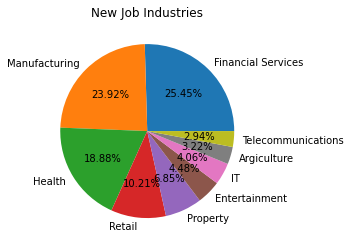

In [52]:
# Distribution of the Jobs of the customers
newCustomers.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('New Job Industries')
plt.ylabel('')
plt.show()

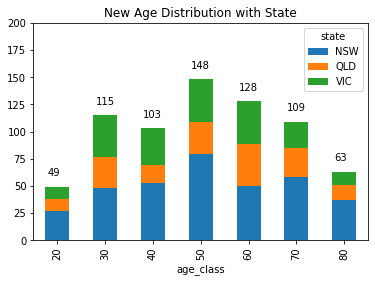

In [53]:
# Age Distribution for the new customers with state graph
newCustomers.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(newCustomers.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .2, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 200])
plt.title('New Age Distribution with State')
plt.show()

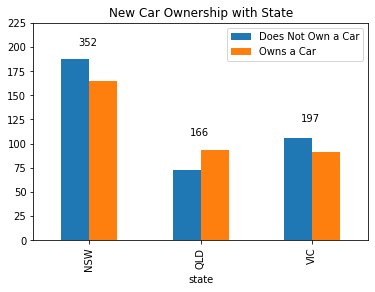

In [54]:
# New customers Car Ownership with State graph
newCustomers.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(newCustomers.groupby('state').agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Car Ownership with State')
plt.legend(['Does Not Own a Car', 'Owns a Car'])
plt.show()

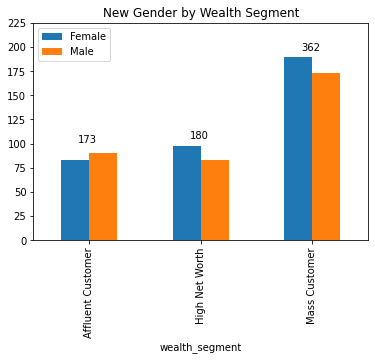

In [55]:
# New customers Gender by Wealth Segment graph
newCustomers.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(newCustomers.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 15, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

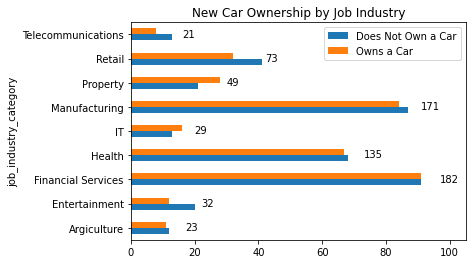

In [56]:
# New customers Car Ownership by Job Industry graph
newCustomers.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(newCustomers.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 6, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,105])
plt.title('New Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

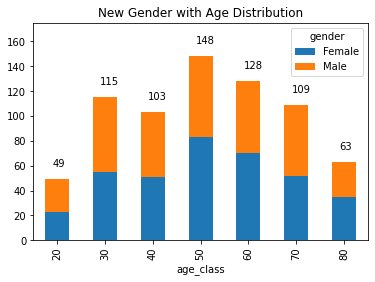

In [57]:
# New customers Gender with Age Distribution graph
newCustomers.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(newCustomers.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 175])
plt.title('New Gender with Age Distribution')
plt.show()

In [58]:
# rename the segmintations to understandable words
customer_address_transaction['customer_segment'] = customer_address_transaction['total_score'].map({
    3: 'Platinum',
    4: 'Very Loyal',
    5: 'Becoming Loyal',
    6: 'Recent',
    7: 'Average',
    8: 'High Risk',
    9: 'Evasive',
    10: 'Losing',
    11: 'Inactive',
    12: 'Lost'
})
customer_address_transaction

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,gender,...,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation,customer_segment
customer_id,,,,,,,,,,,,,,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,5,silver,Female,...,1,11.0,68.640722,70,060 Morning Avenue,2016,NSW,Australia,10,Becoming Loyal
2,128.0,3,2226.26,4,4,2,442,10,basic,Male,...,1,16.0,41.461520,40,6 Meadow Vale Court,2153,NSW,Australia,10,Losing
4,195.0,2,220.57,4,4,4,444,12,basic,Male,...,0,7.0,60.665199,60,0 Holy Cross Court,4211,QLD,Australia,9,Lost
6,64.0,5,3946.55,3,2,3,323,8,basic,Male,...,1,13.0,55.712326,60,9 Oakridge Court,3216,VIC,Australia,9,High Risk
7,253.0,3,220.11,4,4,4,444,12,basic,Female,...,1,11.0,46.274760,50,4 Delaware Trail,2210,NSW,Australia,9,Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,256.0,4,2045.84,4,4,2,442,10,basic,Male,...,1,19.0,36.106174,40,2565 Caliangt Point,2171,NSW,Australia,9,Losing
3497,52.0,3,1648.32,3,4,4,344,11,basic,Female,...,1,18.0,36.084270,40,96 Delladonna Trail,3976,VIC,Australia,5,Inactive
3498,127.0,6,3147.33,4,3,3,433,10,basic,Female,...,0,5.0,26.583733,30,3 Nova Point,3012,VIC,Australia,4,Losing


In [59]:
# save the best 1000 customers
top_1000 = customer_address_transaction.sort_values('rfm_class').head(1000)
top_1000

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,gender,...,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation,customer_segment
customer_id,,,,,,,,,,,,,,,,,,,,,
1991,1.0,10,8256.08,1,1,1,111,3,gold,Male,...,1,8.0,28.680970,30,42554 Burrows Court,2117,NSW,Australia,10,Platinum
2111,6.0,9,4790.82,1,1,1,111,3,gold,Male,...,1,12.0,48.429493,50,91933 Artisan Avenue,2753,NSW,Australia,9,Platinum
577,2.0,11,4242.34,1,1,1,111,3,gold,Female,...,1,19.0,66.151965,70,8 Pawling Alley,3930,VIC,Australia,8,Platinum
2120,2.0,8,4543.18,1,1,1,111,3,gold,Male,...,0,1.0,25.411909,30,35 Harbort Way,2446,NSW,Australia,8,Platinum
2130,1.0,8,4253.77,1,1,1,111,3,gold,Female,...,1,16.0,32.418213,30,26064 Morningstar Junction,2480,NSW,Australia,2,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,23.0,5,3426.54,2,2,3,223,7,bronze,Male,...,1,7.0,47.134463,50,33794 Sommers Crossing,2502,NSW,Australia,6,Average
2480,42.0,5,3382.40,2,2,3,223,7,bronze,Female,...,1,16.0,50.436379,50,22779 Graedel Road,4655,QLD,Australia,2,Average
1314,27.0,5,2894.17,2,2,3,223,7,bronze,Female,...,1,6.0,52.273514,50,210 Esch Park,2452,NSW,Australia,8,Average


In [90]:
customer_address_transaction.to_csv('KPMG_cleaned_data.csv', index=False)
top_1000.to_csv('KPMG_top1000_data.csv',index=False)